In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Q1TrainData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   yield           1500 non-null   float64
 2   species         1500 non-null   object 
 3   region          1500 non-null   object 
 4   size_range      1500 non-null   object 
 5   dump_size       1500 non-null   float64
 6   cooking_time    1500 non-null   float64
 7   post_cook_temp  1500 non-null   float64
dtypes: float64(4), object(4)
memory usage: 93.9+ KB


In [ ]:
"""
1.1500 entries; no null values
2.4 numeric attributes and 4 non-numeris attributes
"""

count    1500.000000
mean        0.551607
std         0.223055
min        -0.250886
25%         0.407156
50%         0.540217
75%         0.686476
max         1.498664
Name: yield, dtype: float64


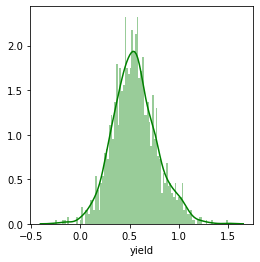

In [4]:
print(df['yield'].describe())
plt.figure(figsize=(4, 4))
sns.distplot(df['yield'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
"""
Normal distribution of yield with center at 0.5
"""

In [5]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,yield,dump_size,cooking_time,post_cook_temp
0,0.584864,1888.276084,2.066711,66.166377
1,0.225613,2209.729676,1.890274,61.966487
2,0.428228,2139.592815,1.869006,64.455046
3,0.564230,1994.035137,3.002083,66.917412
4,0.570164,1843.128772,1.814764,66.077501


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93eddf4d00>,
      dtype=object)

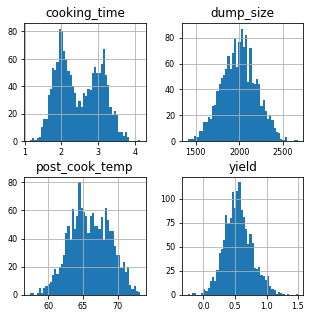

In [7]:
df_num.hist(figsize=(5, 5), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
"""
post_cook_time has a bimodal normal distribution
"""

In [8]:
df_num_corr = df_num.corr()['yield'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with yield:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with yield:
yield    1.0
Name: yield, dtype: float64


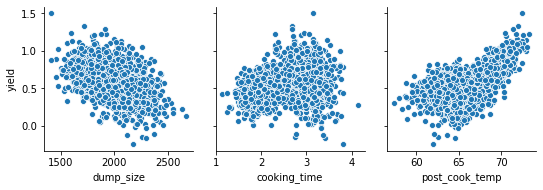

In [9]:
for i in range(1, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['yield'])

In [ ]:
"""
dump_size and post_cook_temp have an almost linear relationship with yield
"""

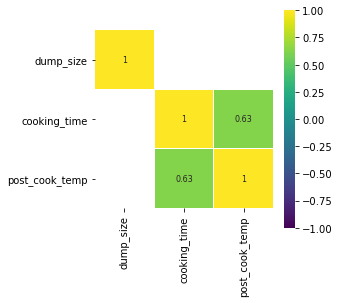

In [10]:
corr = df_num.drop('yield', axis=1).corr() 
plt.figure(figsize=(4, 4))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
"""
cooking_time and post_cook_temp are strongly correlated
"""

In [11]:
quantitative_features_list = ['yield','dump_size','cooking_time','post_cook_temp']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,yield,dump_size,cooking_time,post_cook_temp
0,0.584864,1888.276084,2.066711,66.166377
1,0.225613,2209.729676,1.890274,61.966487
2,0.428228,2139.592815,1.869006,64.455046
3,0.564230,1994.035137,3.002083,66.917412
4,0.570164,1843.128772,1.814764,66.077501


In [12]:
features_to_analyse = [x for x in quantitative_features_list]

In [13]:
df[features_to_analyse]

,yield,dump_size,cooking_time,post_cook_temp
0,0.584864,1888.276084,2.066711,66.166377
1,0.225613,2209.729676,1.890274,61.966487
2,0.428228,2139.592815,1.869006,64.455046
3,0.564230,1994.035137,3.002083,66.917412
4,0.570164,1843.128772,1.814764,66.077501
...,...,...,...,...
1495,0.665235,1598.638016,2.370117,59.757218
1496,0.611391,1754.095056,1.913083,65.389543
1497,0.818726,1783.872145,2.414532,62.410697
1498,0.542151,1711.681223,1.977423,59.445687


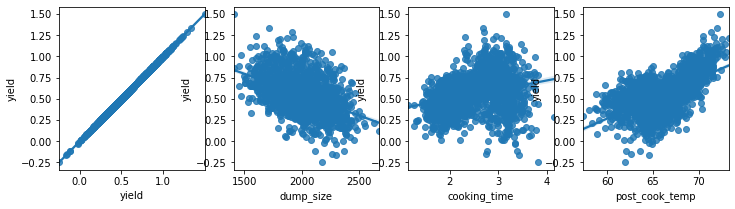

In [14]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse):
        sns.regplot(x=features_to_analyse[i],y='yield', data=df[features_to_analyse], ax=ax)

In [15]:
categorical_features = [a for a in features_to_analyse[1:] + df.columns.tolist() if (a not in features_to_analyse[1:]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.drop(columns=['date'],inplace=True)
df_categ.head()

/Users/devikapurushothaman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,yield,species,region,size_range
0,0.584864,Albacore,Indian ocean,4-5
1,0.225613,Albacore,Pacific ocean,3-4
2,0.428228,Albacore,Pacific ocean,>6
3,0.564230,Yellowfin,Indian ocean,1-3
4,0.570164,Albacore,Indian ocean,3-4


In [16]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))


There is 3 non numerical features including:
['species', 'region', 'size_range']


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

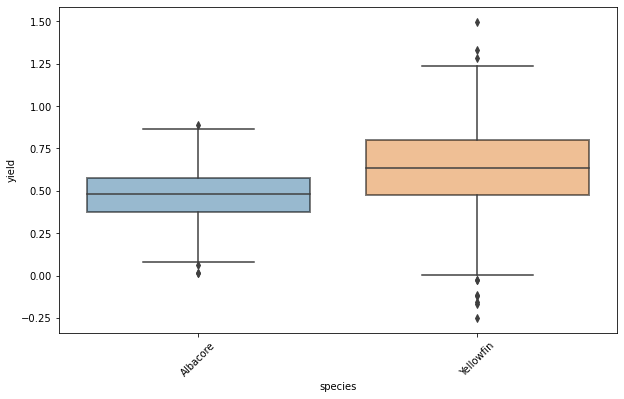

In [17]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='species', y='yield', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

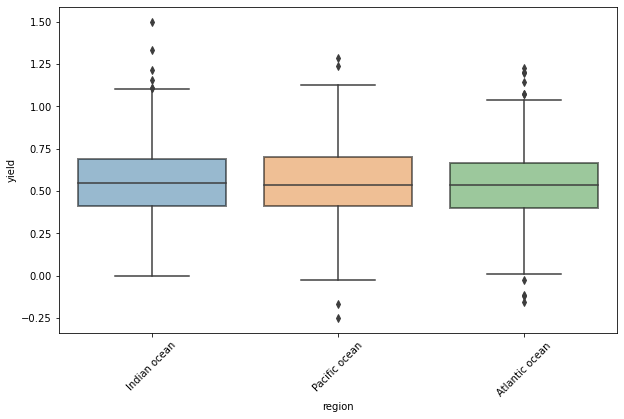

In [18]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='region', y='yield', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

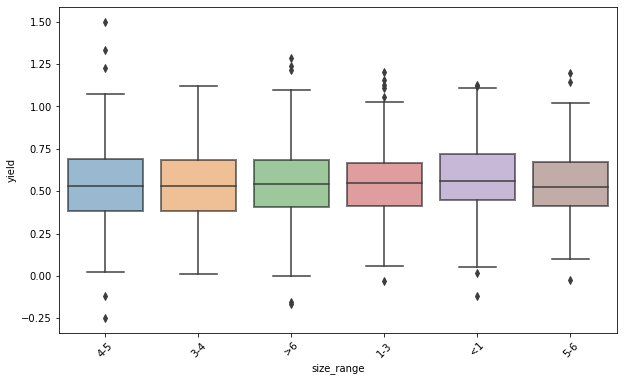

In [19]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='size_range', y='yield', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

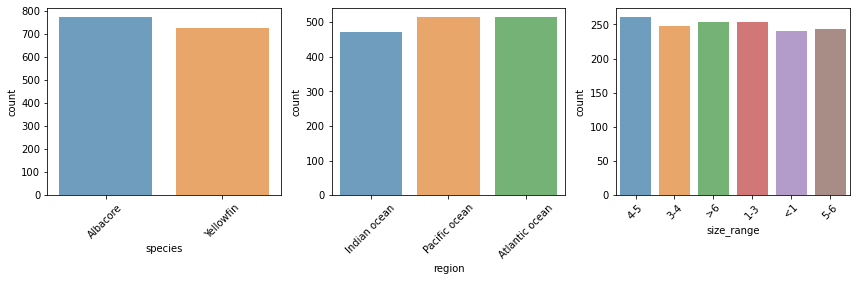

In [20]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 4))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()